In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import folium
from folium import plugins
import plotly.express as px
import plotly.io as pio
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
import geopandas as gpd
import plotly.tools as tls
from matplotlib import style
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
from folium.plugins import HeatMap
%matplotlib inline

In [2]:
# Read SSP2 population data 
df = pd.read_csv("/Users/lilipanczel/MDA/project/data/pop_ssp2.csv")

In [3]:
df.head(6)

gID         px        py ISO3       p2_1980       p2_1990       p2_2000  \
0    1 -179.95988 -16.38242  FJI  4.556941e-03  5.075543e-03  6.017392e-03   
1    2 -179.94336 -15.73900  FJI  3.656185e-03  4.085237e-03  4.671395e-03   
2    3 -179.90168 -16.78760  FJI  5.225794e-03  5.843468e-03  7.043731e-03   
3    4 -179.86174 -19.00430  FJI  3.656185e-03  4.085237e-03  4.671395e-03   
4    5 -179.82871 -18.95897  FJI  5.270612e-03  5.867976e-03  7.090053e-03   
5    6 -179.79535  65.70644  RUS  2.681897e-07  3.612476e-07  4.022052e-07   

        p2_2010       p2_2020       p2_2030       p2_2040       p2_2050  \
0  2.120253e-04  2.145605e-04  2.094786e-04  1.642625e-04  1.428038e-04   
1  0.000000e+00  1.053288e-07  9.353782e-08  8.539651e-08  7.783711e-08   
2  3.727913e-04  3.821281e-04  3.795482e-04  3.000609e-04  2.621240e-04   
3  7.017828e-07  4.963953e-08  1.066071e-09  1.096757e-09  1.048663e-09   
4  3.814356e-04  3.932052e-04  4.051430e-04  3.285330e-04  2.918664e-04   
5  4.961348e-07  4.962358e-07  5.725180e-07  5.742222e-07  6.144120e-07   

        p2_2060       p2_2070       p2_2080       p2_2090       p2_2100  
0  1.231084e-04  1.006813e-04  8.394810e-05  6.923256e-05  5.399158e-05  
1  7.275300e-08  6.834304e-08  6.346407e-08  5.940695e-08  6.146598e-08  
2  2.272429e-04  1.874947e-04  1.579681e-04  1.312797e-04  1.030071e-04  
3  9.804189e-10  9.182726e-10  8.568019e-10  8.095699e-10  8.515627e-10  
4  2.543943e-04  2.087341e-04  1.746460e-04  1.445871e-04  1.132128e-04  
5  6.451906e-07  6.039127e-07  5.627395e-07  4.942621e-07  3.871704e-07

    * gID ID of the grids
    * px Longitude of the center of each grid masked by countries
    * py Latitude of the center of each grid masked by countries
    * ISO3 Country code (ISO3)
    * P2_<YEAR> Years


In [4]:
df.isna().sum()

gID        0
px         0
py         0
ISO3       0
p2_1980    0
p2_1990    0
p2_2000    0
p2_2010    0
p2_2020    0
p2_2030    0
p2_2040    0
p2_2050    0
p2_2060    0
p2_2070    0
p2_2080    0
p2_2090    0
p2_2100    0
dtype: int64

In [5]:
print('Dimensions of the dataset:',df.shape)

Dimensions of the dataset: (75228, 17)


In [6]:
df.dtypes

gID          int64
px         float64
py         float64
ISO3        object
p2_1980    float64
p2_1990    float64
p2_2000    float64
p2_2010    float64
p2_2020    float64
p2_2030    float64
p2_2040    float64
p2_2050    float64
p2_2060    float64
p2_2070    float64
p2_2080    float64
p2_2090    float64
p2_2100    float64
dtype: object

# Data Visualization

## Overall Population Change in the World 

In [7]:
df2 = df.iloc[:,4:]
df2.head(5)

p2_1980   p2_1990   p2_2000       p2_2010       p2_2020       p2_2030  \
0  0.004557  0.005076  0.006017  2.120253e-04  2.145605e-04  2.094786e-04   
1  0.003656  0.004085  0.004671  0.000000e+00  1.053288e-07  9.353782e-08   
2  0.005226  0.005843  0.007044  3.727913e-04  3.821281e-04  3.795482e-04   
3  0.003656  0.004085  0.004671  7.017828e-07  4.963953e-08  1.066071e-09   
4  0.005271  0.005868  0.007090  3.814356e-04  3.932052e-04  4.051430e-04   

        p2_2040       p2_2050       p2_2060       p2_2070       p2_2080  \
0  1.642625e-04  1.428038e-04  1.231084e-04  1.006813e-04  8.394810e-05   
1  8.539651e-08  7.783711e-08  7.275300e-08  6.834304e-08  6.346407e-08   
2  3.000609e-04  2.621240e-04  2.272429e-04  1.874947e-04  1.579681e-04   
3  1.096757e-09  1.048663e-09  9.804189e-10  9.182726e-10  8.568019e-10   
4  3.285330e-04  2.918664e-04  2.543943e-04  2.087341e-04  1.746460e-04   

        p2_2090       p2_2100  
0  6.923256e-05  5.399158e-05  
1  5.940695e-08  6.146598e-08  
2  1.312797e-04  1.030071e-04  
3  8.095699e-10  8.515627e-10  
4  1.445871e-04  1.132128e-04

In [8]:
# Extract year from last 4 characters of each column name
# The current column names are structured as 'p2_(year)'
# so we want to keep the (year) part only for clarity when plotting population size vs. years
# To do this we use strip(), which removes from the string the characters stated in the argument
# This method works on strings, so we call str before strip()
years = df2.columns.str[3:]
# Convert year values to integers, saving results back to dataframe
df2.columns = years.astype(int)
df2.head(5)

1980      1990      2000          2010          2020          2030  \
0  0.004557  0.005076  0.006017  2.120253e-04  2.145605e-04  2.094786e-04   
1  0.003656  0.004085  0.004671  0.000000e+00  1.053288e-07  9.353782e-08   
2  0.005226  0.005843  0.007044  3.727913e-04  3.821281e-04  3.795482e-04   
3  0.003656  0.004085  0.004671  7.017828e-07  4.963953e-08  1.066071e-09   
4  0.005271  0.005868  0.007090  3.814356e-04  3.932052e-04  4.051430e-04   

           2040          2050          2060          2070          2080  \
0  1.642625e-04  1.428038e-04  1.231084e-04  1.006813e-04  8.394810e-05   
1  8.539651e-08  7.783711e-08  7.275300e-08  6.834304e-08  6.346407e-08   
2  3.000609e-04  2.621240e-04  2.272429e-04  1.874947e-04  1.579681e-04   
3  1.096757e-09  1.048663e-09  9.804189e-10  9.182726e-10  8.568019e-10   
4  3.285330e-04  2.918664e-04  2.543943e-04  2.087341e-04  1.746460e-04   

           2090          2100  
0  6.923256e-05  5.399158e-05  
1  5.940695e-08  6.146598e-08  
2  1.312797e-04  1.030071e-04  
3  8.095699e-10  8.515627e-10  
4  1.445871e-04  1.132128e-04

In [9]:
total = df2.sum()
print(total)

1980    4465.560789
1990    5276.817275
2000    6155.440859
2010    6864.681869
2020    7607.951143
2030    8257.875402
2040    8781.123791
2050    9159.530521
2060    9370.359999
2070    9435.245420
2080    9378.928888
2090    9220.093057
2100    8994.074508
dtype: float64


Text(0, 0.5, 'World Population (in millions)')

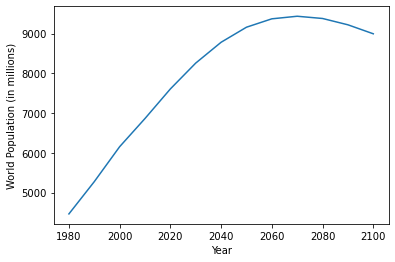

In [10]:
total.plot()
plt.xlabel('Year')
plt.ylabel('World Population (in millions)')

In [11]:
df_group = df.groupby('ISO3')
df_group.size()

ISO3
AFG    307
AGO    487
ALB     25
AND      4
ARE     50
      ... 
WSM      8
YEM    198
ZAF    538
ZMB    309
ZWE    168
Length: 194, dtype: int64

In [12]:
population_by_country = df_group.sum()

In [13]:
population_by_country = population_by_country.iloc[:,3:]
population_by_country.head()

p2_1980    p2_1990    p2_2000    p2_2010    p2_2020    p2_2030  \
ISO3                                                                     
AFG   12.216340  12.976180  19.088899  31.411743  40.602142  51.689360   
AGO    7.828122  10.086945  14.273150  19.081912  25.239158  31.855157   
ALB    3.287207   3.506244   3.972555   3.204284   3.270742   3.300564   
AND    0.039877   0.060276   0.072316   0.080807   0.087393   0.092775   
ARE    1.130362   1.607431   3.370898   7.511690  11.042872  13.358532   

        p2_2040    p2_2050    p2_2060    p2_2070     p2_2080     p2_2090  \
ISO3                                                                       
AFG   63.598755  75.161958  85.821562  95.120751  102.899386  108.980287   
AGO   38.163798  43.976156  48.855870  52.597806   55.141770   56.598233   
ALB    3.274407   3.201495   3.095009   2.941648    2.741440    2.523715   
AND    0.097325   0.101266   0.104743   0.107852    0.110666    0.113234   
ARE   15.357002  16.915151  17.963079  18.298886   17.969521   17.281761   

         p2_2100  
ISO3              
AFG   113.085978  
AGO    56.891920  
ALB     2.318520  
AND     0.115596  
ARE    16.326899

In [14]:
population_by_country.columns.str[3:]

Index(['1980', '1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060',
       '2070', '2080', '2090', '2100'],
      dtype='object')

In [15]:
year=population_by_country.columns.str[3:]
population_by_country.columns = years.astype(int)
population_by_country.head()

1980       1990       2000       2010       2020       2030  \
ISO3                                                                     
AFG   12.216340  12.976180  19.088899  31.411743  40.602142  51.689360   
AGO    7.828122  10.086945  14.273150  19.081912  25.239158  31.855157   
ALB    3.287207   3.506244   3.972555   3.204284   3.270742   3.300564   
AND    0.039877   0.060276   0.072316   0.080807   0.087393   0.092775   
ARE    1.130362   1.607431   3.370898   7.511690  11.042872  13.358532   

           2040       2050       2060       2070        2080        2090  \
ISO3                                                                       
AFG   63.598755  75.161958  85.821562  95.120751  102.899386  108.980287   
AGO   38.163798  43.976156  48.855870  52.597806   55.141770   56.598233   
ALB    3.274407   3.201495   3.095009   2.941648    2.741440    2.523715   
AND    0.097325   0.101266   0.104743   0.107852    0.110666    0.113234   
ARE   15.357002  16.915151  17.963079  18.298886   17.969521   17.281761   

            2100  
ISO3              
AFG   113.085978  
AGO    56.891920  
ALB     2.318520  
AND     0.115596  
ARE    16.326899

Text(0, 0.5, 'Population size (in millions)')

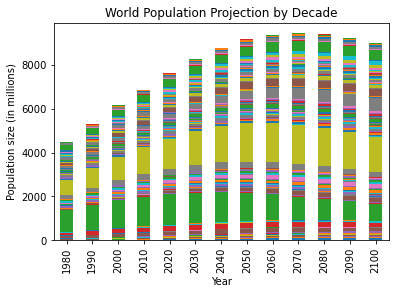

In [16]:
population_by_country_T = population_by_country.transpose()
sbc_plot = population_by_country_T.plot(kind='bar',stacked=True,title="World Population Projection by Decade", legend=None)
sbc_plot.set_xlabel("Year")
sbc_plot.set_ylabel("Population size (in millions)")

In [17]:
df3 = pd.melt(population_by_country.reset_index(), id_vars='ISO3', var_name="Year", value_name="Population") 
df3.sort_values(
    by=["ISO3", "Year"])[["ISO3", "Year"]]
print(df3)

     ISO3  Year  Population
0     AFG  1980   12.216340
1     AGO  1980    7.828122
2     ALB  1980    3.287207
3     AND  1980    0.039877
4     ARE  1980    1.130362
...   ...   ...         ...
2517  WSM  2100    0.135080
2518  YEM  2100   77.280980
2519  ZAF  2100   58.483543
2520  ZMB  2100   43.432902
2521  ZWE  2100   11.481153

[2522 rows x 3 columns]


In [18]:
plotlybarchart = px.bar(
    data_frame=df3,
    x="Year",
    y="Population",
    color="ISO3",
    opacity=0.9,
    orientation="v",
    barmode='relative')
pio.show(plotlybarchart)

## Population changes in certain countries of interest 

### India

In [19]:
india_df = df3[df3.ISO3=='IND']

In [20]:
India = px.bar(
    data_frame=india_df,
    x="Year",
    y="Population")
pio.show(India)

### China

In [21]:
china_df = df3[df3.ISO3=='CHN']

In [22]:
China = px.bar(
    data_frame=china_df,
    x="Year",
    y="Population")
pio.show(China)

### USA

In [23]:
USA_df = df3[df3.ISO3=='USA']

In [24]:
USA = px.bar(
    data_frame=USA_df,
    x="Year",
    y="Population")
pio.show(USA)

### Nigeria

In [25]:
Nigeria_df = df3[df3.ISO3=='NGA']

In [26]:
Nigeria = px.bar(
    data_frame=Nigeria_df,
    x="Year",
    y="Population")
pio.show(Nigeria)

## Maps showing densely populated areas by decade (Population density heat map)

In [27]:
df_geo = pd.melt(df.reset_index(), id_vars=["gID", "px", "py"], value_vars=["p2_1980","p2_1990","p2_2000","p2_2010","p2_2020","p2_2030","p2_2040","p2_2050","p2_2060","p2_2070","p2_2080","p2_2090","p2_2100"], var_name="Year", value_name="Population")
df_geo = df_geo.rename(columns={'px':'Longitude', 'py': 'Latitude'})
df_geo.head()

gID  Longitude  Latitude     Year  Population
0    1 -179.95988 -16.38242  p2_1980    0.004557
1    2 -179.94336 -15.73900  p2_1980    0.003656
2    3 -179.90168 -16.78760  p2_1980    0.005226
3    4 -179.86174 -19.00430  p2_1980    0.003656
4    5 -179.82871 -18.95897  p2_1980    0.005271

In [28]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [30]:
df5 = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo.Longitude, df_geo.Latitude))

In [31]:
df5.crs = "EPSG:4326"

In [32]:
df5.to_crs(epsg=3395)

gID  Longitude  Latitude     Year    Population  \
0           1 -179.95988 -16.38242  p2_1980  4.556941e-03   
1           2 -179.94336 -15.73900  p2_1980  3.656185e-03   
2           3 -179.90168 -16.78760  p2_1980  5.225794e-03   
3           4 -179.86174 -19.00430  p2_1980  3.656185e-03   
4           5 -179.82871 -18.95897  p2_1980  5.270612e-03   
...       ...        ...       ...      ...           ...   
977959  75224  179.76484 -16.68540  p2_2100  5.363726e-03   
977960  75225  179.84831  -9.39672  p2_2100  6.132013e-04   
977961  75226  179.89584 -18.59261  p2_2100  1.414689e-03   
977962  75227  179.92776 -17.00375  p2_2100  1.569966e-03   
977963  75228  179.93522  71.51525  p2_2100  1.449801e-12   

                                  geometry  
0       POINT (-20033042.205 -1837007.015)  
1       POINT (-20031203.207 -1762933.235)  
2       POINT (-20026563.410 -1883779.942)  
3       POINT (-20022117.310 -2141534.853)  
4       POINT (-20018440.427 -2136230.535)  
...                                    ...  
977959   POINT (20011330.451 -1871972.813)  
977960   POINT (20020622.289 -1043787.476)  
977961   POINT (20025913.305 -2093413.869)  
977962   POINT (20029466.623 -1908772.919)  
977963   POINT (20030297.066 11540215.901)  

[977964 rows x 6 columns]

In [33]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = df5.to_json())

In [34]:
# Filtering for Year == 'p2_1980'
heat_df = df5[df5['Year']== 'p2_2020']

In [35]:
heat_df = heat_df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

In [36]:
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

In [37]:
HeatMap(heat_data).add_to(m)

In [38]:
m

https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-analysis

# Transforming grid to regions or cities (Reverse Geocoding)

In [39]:
coordinates_df = df_geo.iloc[:,1:3]
coordinates_df.head()

Longitude  Latitude
0 -179.95988 -16.38242
1 -179.94336 -15.73900
2 -179.90168 -16.78760
3 -179.86174 -19.00430
4 -179.82871 -18.95897

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [41]:
# A GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame. (note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])
countries_df = gpd.GeoDataFrame(coordinates_df, geometry=gpd.points_from_xy(coordinates_df.Longitude, coordinates_df.Latitude))

In [42]:
countries_df.crs = "EPSG:4326"

In [43]:
countries_df.to_crs(epsg=3395)

Longitude  Latitude                            geometry
0      -179.95988 -16.38242  POINT (-20033042.205 -1837007.015)
1      -179.94336 -15.73900  POINT (-20031203.207 -1762933.235)
2      -179.90168 -16.78760  POINT (-20026563.410 -1883779.942)
3      -179.86174 -19.00430  POINT (-20022117.310 -2141534.853)
4      -179.82871 -18.95897  POINT (-20018440.427 -2136230.535)
...           ...       ...                                 ...
977959  179.76484 -16.68540   POINT (20011330.451 -1871972.813)
977960  179.84831  -9.39672   POINT (20020622.289 -1043787.476)
977961  179.89584 -18.59261   POINT (20025913.305 -2093413.869)
977962  179.92776 -17.00375   POINT (20029466.623 -1908772.919)
977963  179.93522  71.51525   POINT (20030297.066 11540215.901)

[977964 rows x 3 columns]

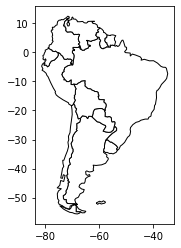

In [44]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')


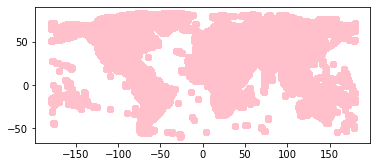

In [45]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

countries_df.plot(ax=ax, color='pink')

plt.show()

Now, the whole map is pink, because our files specifies each and every grid point on the planet, but if we have a dataset with a specific list of coordinates, e.g. ones that have a high likelihood of experiencing water shortage in the future, we can mark it on the map.

https://geopandas.org/gallery/create_geopandas_from_pandas.html